<a href="https://colab.research.google.com/github/Melisacid/Evaluacion/blob/main/CALIFORNIA_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MELISA HERNANDEZ CID 

A01732341

In [25]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **CALIFORNIA**

In [26]:
df= pd.read_csv("California_EUA.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5858.0,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
2,8142.0,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
3,8339.0,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8739.0,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [28]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1325
Length: 75, dtype: int64

In [29]:
valores_nulos=df.isnull().sum().sum()
valores_nulos

48877

## **Etapa 1**

In [30]:
Calif = df.drop(["neighbourhood_group_cleansed", "bathrooms", "calendar_updated"], axis=1)

In [31]:
#Sustituir valores nulos por un string en concreto
Calif["description"] = Calif["description"].fillna("INFO NO DADA")
Calif["neighborhood_overview"] = Calif["neighborhood_overview"].fillna("INFO NO DADA")
Calif["host_location"] = Calif["host_location"].fillna("INFO NO DADA")
Calif["host_about"] = Calif["host_about"].fillna("INFO NO DADA")
Calif["host_response_time"] = Calif["host_response_time"].fillna("INFO NO DADA")
Calif["host_neighbourhood"] = Calif["host_neighbourhood"].fillna("INFO NO DADA")
Calif["neighbourhood"] = Calif["neighbourhood"].fillna("INFO NO DADA")
Calif["bathrooms_text"] = Calif["bathrooms_text"].fillna("INFO NO DADA")
Calif["first_review"] = Calif["first_review"].fillna("INFO NO DADA")
Calif["last_review"] = Calif["last_review"].fillna("INFO NO DADA")
Calif["license"] = Calif["license"].fillna("INFO NO DADA")

In [32]:
valores_nulos=Calif.isnull().sum().sum()
valores_nulos

13635

In [33]:
#CONVERSION DE TIPO DE DATO DE COLUMNA A TIPO OBJECT A FLOAT 
Calif["host_response_rate"] = Calif["host_response_rate"].str.replace('%', '').astype(float)
Calif["host_acceptance_rate"] = Calif["host_acceptance_rate"].str.replace('%', '').astype(float)

In [34]:
Calif["host_response_rate"] = Calif["host_response_rate"].fillna(Calif["host_response_rate"].mean())
Calif["host_acceptance_rate"] = Calif["host_acceptance_rate"].fillna(Calif["host_acceptance_rate"].mean())
Calif["bedrooms"] = Calif["bedrooms"].fillna(Calif["bedrooms"].mean())
Calif["beds"] = Calif["beds"].fillna(Calif["beds"].mean())
Calif["minimum_minimum_nights"] = Calif["minimum_minimum_nights"].fillna(Calif["minimum_minimum_nights"].mean())
Calif["maximum_minimum_nights"] = Calif["maximum_minimum_nights"].fillna(Calif["maximum_minimum_nights"].mean())
Calif["minimum_maximum_nights"] = Calif["minimum_maximum_nights"].fillna(Calif["minimum_maximum_nights"].mean())
Calif["maximum_maximum_nights"] = Calif["maximum_maximum_nights"].fillna(Calif["maximum_maximum_nights"].mean())
Calif["review_scores_rating"] = Calif["review_scores_rating"].fillna(Calif["review_scores_rating"].mean())
Calif["review_scores_accuracy"] = Calif["review_scores_accuracy"].fillna(Calif["review_scores_accuracy"].mean())
Calif["review_scores_cleanliness"] = Calif["review_scores_cleanliness"].fillna(Calif["review_scores_cleanliness"].mean())
Calif["review_scores_checkin"] = Calif["review_scores_checkin"].fillna(Calif["review_scores_checkin"].mean())
Calif["review_scores_communication"] = Calif["review_scores_communication"].fillna(Calif["review_scores_communication"].mean())
Calif["review_scores_location"] = Calif["review_scores_location"].fillna(Calif["review_scores_location"].mean())
Calif["review_scores_value"] = Calif["review_scores_value"].fillna(Calif["review_scores_value"].mean())

In [35]:
valores_nulos=Calif.isnull().sum().sum()
valores_nulos

1338

In [36]:
Calif["host_is_superhost"] = Calif["host_is_superhost"].fillna(method="bfill")

In [37]:
Calif["minimum_nights_avg_ntm"] = Calif["minimum_nights_avg_ntm"].fillna(Calif["minimum_nights_avg_ntm"].median())
Calif["maximum_nights_avg_ntm"] = Calif["maximum_nights_avg_ntm"].fillna(Calif["maximum_nights_avg_ntm"].median())
Calif["reviews_per_month"] = Calif["reviews_per_month"].fillna(Calif["reviews_per_month"].median())

In [38]:
valores_nulos=Calif.isnull().sum().sum()
valores_nulos

0

## **Eliminación de outliers por el método IQR**

In [39]:
#SEPARAMOS LAS COLUMNAS CUANTITATIVAS DEL DATA2
import pandas as pd
# Verificar los tipos de datos de cada columna
print(Calif.dtypes)
# Seleccionar las variables numéricas
num = Calif.select_dtypes(include="number")
# Mostrar el DataFrame resultante
print(num)

id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 72, dtype: object
                id     scrape_id    host_id  host_response_rate  \
0     9.580000e+02  2.020000e+13       1169          100.000000   
1     5.858000e+03  2.020000e+13       8904           80.000000   
2     8.142000e+03  2.020000e+13      21994          100.000000   
3     8.339000e+03  2.020000e+13      24215          100.000000   
4     8.739000e+03  2.0

In [40]:
num.info()
#nos damos cuenta que son numericas por el dtype 
#float64 e int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   scrape_id                                     6936 non-null   float64
 2   host_id                                       6936 non-null   int64  
 3   host_response_rate                            6936 non-null   float64
 4   host_acceptance_rate                          6936 non-null   float64
 5   host_listings_count                           6936 non-null   int64  
 6   host_total_listings_count                     6936 non-null   int64  
 7   latitude                                      6936 non-null   float64
 8   longitude                                     6936 non-null   float64
 9   accommodates                                  6936 non-null   i

In [41]:
num.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169,100.0,100.0,1,1,37.77028,-122.43317,3,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,5858.0,2.020000e+13,8904,80.0,71.0,2,2,37.74474,-122.42089,4,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
2,8142.0,2.020000e+13,21994,100.0,73.0,13,14,37.76555,-122.45213,1,...,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09
3,8339.0,2.020000e+13,24215,100.0,0.0,2,6,37.77564,-122.43642,4,...,5.00,4.94,5.00,4.94,4.75,2,2,0,0,0.17
4,8739.0,2.020000e+13,7149,100.0,90.0,2,2,37.76030,-122.42197,3,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65


In [42]:
num2=num.copy()

<Figure size 1500x800 with 0 Axes>

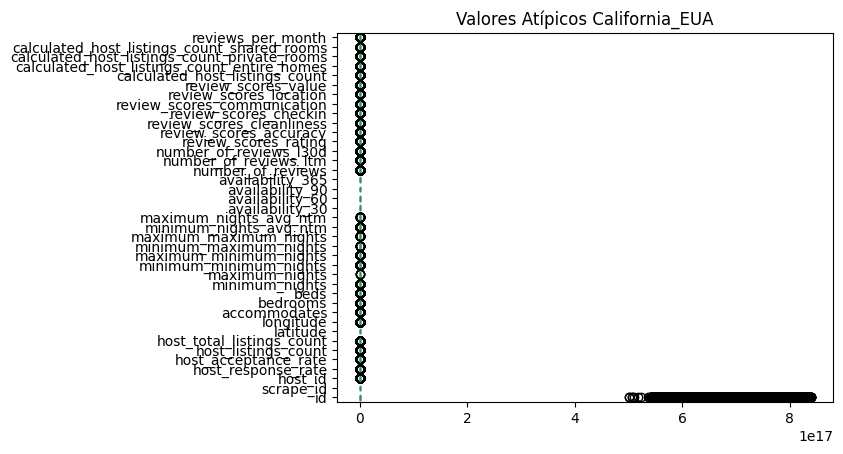

In [43]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
num2.plot(kind='box', vert=False)
plt.title("Valores Atípicos California_EUA")
plt.show() #dibujamos el diagrama

In [44]:
#Encuentro cuartiles 0.25 y 0.75
y=num2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)

Limite superior permitido id                                              1.067459e+08
scrape_id                                       2.020000e+13
host_id                                         4.243084e+08
host_response_rate                              1.065387e+02
host_acceptance_rate                            1.179892e+02
host_listings_count                             3.850000e+01
host_total_listings_count                       5.700000e+01
latitude                                        3.783859e+01
longitude                                      -1.223622e+02
accommodates                                    7.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  7.200000e+01
maximum_nights                                  2.769000e+03
minimum_minimum_nights                          7.200000e+01
maximum_minimum_nights                          7.200000e+0

In [45]:
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite inferior permitido id                                             -3.562532e+07
scrape_id                                       2.020000e+13
host_id                                        -2.452959e+08
host_response_rate                              8.910216e+01
host_acceptance_rate                            7.001793e+01
host_listings_count                            -2.150000e+01
host_total_listings_count                      -3.100000e+01
latitude                                        3.770181e+01
longitude                                      -1.224912e+02
accommodates                                   -1.000000e+00
bedrooms                                       -5.000000e-01
beds                                           -5.000000e-01
minimum_nights                                 -4.000000e+01
maximum_nights                                 -1.615000e+03
minimum_minimum_nights                         -4.000000e+01
maximum_minimum_nights                         -4.000000e+0

In [46]:
#Encontramos Outliers del Dataframe
outliers= num2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,8.180000e+17,NaN,495900269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,8.180000e+17,NaN,499392537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6933,8.180000e+17,NaN,499294716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,8.180000e+17,NaN,485596413.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Obtenemos datos limpios del Dataframe
limpios= num2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
limpios

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169.0,100.000000,100.000000,1.0,1.0,37.770280,-122.433170,3.0,...,4.920000,4.950000,4.880000,4.980000,4.760000,1.0,1.0,0.0,0.0,2.31
1,5858.0,2.020000e+13,8904.0,NaN,71.000000,2.0,2.0,37.744740,-122.420890,4.0,...,4.870000,4.890000,4.850000,4.770000,4.680000,1.0,1.0,0.0,0.0,0.66
2,8142.0,2.020000e+13,21994.0,100.000000,73.000000,13.0,14.0,37.765550,-122.452130,1.0,...,4.440000,4.780000,4.780000,4.670000,4.670000,13.0,0.0,NaN,0.0,0.09
3,8339.0,2.020000e+13,24215.0,100.000000,NaN,2.0,6.0,37.775640,-122.436420,4.0,...,5.000000,4.940000,5.000000,4.940000,4.750000,2.0,2.0,0.0,0.0,0.17
4,8739.0,2.020000e+13,7149.0,100.000000,90.000000,2.0,2.0,37.760300,-122.421970,3.0,...,4.940000,4.950000,4.960000,4.930000,4.740000,2.0,0.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,NaN,2.020000e+13,NaN,100.000000,100.000000,9.0,9.0,37.791994,-122.410000,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,5.0,5.0,0.0,0.0,0.56
6932,NaN,2.020000e+13,NaN,95.640865,88.007172,1.0,1.0,37.763060,-122.432023,2.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,1.00
6933,NaN,2.020000e+13,NaN,95.640865,88.007172,1.0,1.0,37.777633,-122.416478,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,1.0,0.0,1.0,0.0,0.56
6934,NaN,2.020000e+13,NaN,100.000000,NaN,3.0,4.0,37.738325,-122.396603,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,3.0,0.0,3.0,0.0,0.56


In [48]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=limpios.isnull().sum()
valores_nulos

id                                              1573
scrape_id                                          0
host_id                                          413
host_response_rate                               554
host_acceptance_rate                             791
host_listings_count                             1128
host_total_listings_count                       1196
latitude                                           0
longitude                                        327
accommodates                                     279
bedrooms                                         228
beds                                             558
minimum_nights                                   200
maximum_nights                                     4
minimum_minimum_nights                           231
maximum_minimum_nights                           346
minimum_maximum_nights                            21
maximum_maximum_nights                            36
minimum_nights_avg_ntm                        

In [49]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
ncali=limpios.copy()
ncali=ncali.fillna(round(limpios.mean(),1))
ncali

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169.0,100.000000,100.000000,1.0,1.0,37.770280,-122.433170,3.0,...,4.920000,4.950000,4.880000,4.980000,4.760000,1.0,1.0,0.0,0.0,2.31
1,5858.0,2.020000e+13,8904.0,98.800000,71.000000,2.0,2.0,37.744740,-122.420890,4.0,...,4.870000,4.890000,4.850000,4.770000,4.680000,1.0,1.0,0.0,0.0,0.66
2,8142.0,2.020000e+13,21994.0,100.000000,73.000000,13.0,14.0,37.765550,-122.452130,1.0,...,4.440000,4.780000,4.780000,4.670000,4.670000,13.0,0.0,0.7,0.0,0.09
3,8339.0,2.020000e+13,24215.0,100.000000,93.900000,2.0,6.0,37.775640,-122.436420,4.0,...,5.000000,4.940000,5.000000,4.940000,4.750000,2.0,2.0,0.0,0.0,0.17
4,8739.0,2.020000e+13,7149.0,100.000000,90.000000,2.0,2.0,37.760300,-122.421970,3.0,...,4.940000,4.950000,4.960000,4.930000,4.740000,2.0,0.0,2.0,0.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,27790615.3,2.020000e+13,87507815.4,100.000000,100.000000,9.0,9.0,37.791994,-122.410000,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,5.0,5.0,0.0,0.0,0.56
6932,27790615.3,2.020000e+13,87507815.4,95.640865,88.007172,1.0,1.0,37.763060,-122.432023,2.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,1.00
6933,27790615.3,2.020000e+13,87507815.4,95.640865,88.007172,1.0,1.0,37.777633,-122.416478,1.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,1.0,0.0,1.0,0.0,0.56
6934,27790615.3,2.020000e+13,87507815.4,100.000000,93.900000,3.0,4.0,37.738325,-122.396603,2.0,...,4.767581,4.879061,4.854186,4.786647,4.663201,3.0,0.0,3.0,0.0,0.56


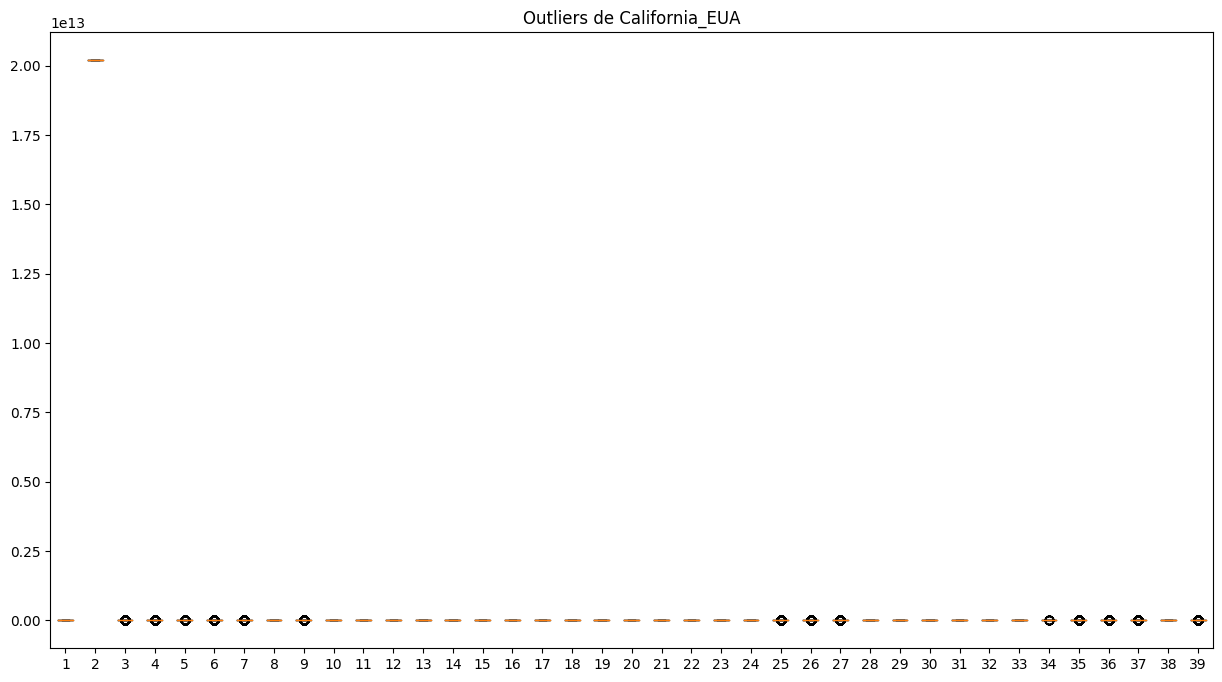

In [50]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(15, 8))
plt.boxplot(ncali) 
plt.title("Outliers de California_EUA")
plt.show() #dibujamos el diagrama

In [51]:
num2.select_dtypes(include=['object'])

""
0
1
2
3
4
...
6931
6932
6933
6934


In [52]:
cuali = num2.select_dtypes(include=['object'])
Datoslimpios= pd.concat([cuali, ncali], axis=1)
Datoslimpios.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,2.020000e+13,1169.0,100.0,100.0,1.0,1.0,37.77028,-122.43317,3.0,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,5858.0,2.020000e+13,8904.0,98.8,71.0,2.0,2.0,37.74474,-122.42089,4.0,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,8142.0,2.020000e+13,21994.0,100.0,73.0,13.0,14.0,37.76555,-122.45213,1.0,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,0.7,0.0,0.09
3,8339.0,2.020000e+13,24215.0,100.0,93.9,2.0,6.0,37.77564,-122.43642,4.0,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
4,8739.0,2.020000e+13,7149.0,100.0,90.0,2.0,2.0,37.76030,-122.42197,3.0,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,0.70


In [53]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datoslimpios.isnull().sum().sum()
valores_nulos

0

## **Etapa 2**

In [67]:
#a) host_acceptance_rate> 50%
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')
h_a_r=df[df['host_acceptance_rate'] > 50]
h_a_r

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [68]:
superhost=df[df['host_is_superhost'] == 't']
superhost

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
7,1.053700e+04,https://www.airbnb.com/rooms/10537,2.020000e+13,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,36752,...,5.00,4.14,4.46,2022-011003STR,f,2,0,2,0,0.12
8,4.918670e+05,https://www.airbnb.com/rooms/491867,2.020000e+13,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,969518,...,4.91,4.91,4.75,STR-0000192,f,1,1,0,0,0.44
9,1.442420e+05,https://www.airbnb.com/rooms/144242,2.020000e+13,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,NaN,https://a0.muscache.com/pictures/c175c400-edad...,699215,...,5.00,4.89,4.95,2022-011317STR,f,1,1,0,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,8.160000e+17,https://www.airbnb.com/rooms/815561340398335999,2.020000e+13,06/03/2023,city scrape,"Spacious Studio w/ Kitchenette, Private Bath &...",Enjoy our spacious studio with modern amenitie...,Our house is conveniently located near Freeway...,https://a0.muscache.com/pictures/96bb96cd-6626...,36046172,...,5.00,5.00,5.00,1133735,f,2,0,2,0,4.00
6918,8.160000e+17,https://www.airbnb.com/rooms/816211107298614925,2.020000e+13,06/03/2023,previous scrape,Cozy room in the heart of SF,Enjoy everything SF has to offer in this cozy ...,The house is in Mission Dolores which is centr...,https://a0.muscache.com/pictures/miso/Hosting-...,375566645,...,NaN,NaN,NaN,NaN,f,14,0,14,0,NaN
6919,8.170000e+17,https://www.airbnb.com/rooms/816849292948023117,2.020000e+13,06/03/2023,city scrape,Elegant and Spacious 2bdrm 2bth,Great location:<br />â€¢ Steps away from prime...,Great location:<br />â€¢ Steps away from prime...,https://a0.muscache.com/pictures/miso/Hosting-...,330231,...,NaN,NaN,NaN,NaN,t,10,10,0,0,NaN
6923,8.170000e+17,https://www.airbnb.com/rooms/816998498709351546,2.020000e+13,06/03/2023,previous scrape,Live-Work Downtown San Francisco Loft,Furnished Live-Work NY-style loft with exposed...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4452428,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [72]:
identity=df[df['host_identity_verified'] == 'f']
identity

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,4.909310e+05,https://www.airbnb.com/rooms/490931,2.020000e+13,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,1269188,...,4.78,4.77,4.66,NaN,f,1,0,1,0,0.74
28,1.823100e+04,https://www.airbnb.com/rooms/18231,2.020000e+13,06/03/2023,city scrape,Loft-like Apt./Garden,"Located on 26th St. in wonderful Noe Valley, t...",We love Noe Valley. It is a wonderful friendly...,https://a0.muscache.com/pictures/145020/505b89...,70224,...,4.90,4.89,4.75,NaN,f,1,1,0,0,0.44
38,1.932920e+05,https://www.airbnb.com/rooms/193292,2.020000e+13,06/03/2023,city scrape,Nice Rooms With Private 1/2 Bath,<b>The space</b><br />Please come and enjoy ou...,NaN,https://a0.muscache.com/pictures/1783939/e4fa3...,937281,...,5.00,4.95,4.90,NaN,f,1,0,1,0,0.46
39,2.013130e+05,https://www.airbnb.com/rooms/201313,2.020000e+13,06/03/2023,city scrape,Fully Furnished 1 bedroom apartment,"Tastefully decorated modern one bedroom, one b...",Location is prime! You are located within a sh...,https://a0.muscache.com/pictures/c96832f5-2ece...,984585,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.05
71,2.311290e+05,https://www.airbnb.com/rooms/231129,2.020000e+13,06/03/2023,city scrape,Nob Hill Mini Mansion,The Dollhouse offers the opportunity to experi...,NaN,https://a0.muscache.com/pictures/2123962/10ffd...,1208533,...,4.38,4.84,4.28,City Registration Pending,f,5,1,4,0,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,8.090000e+17,https://www.airbnb.com/rooms/808995594566778409,2.020000e+13,06/03/2023,city scrape,8A-Private Room (share bath) at Marina/Cow Hollow,Our quiet private room is located at the inter...,Our room offers access to both the Marina and ...,https://a0.muscache.com/pictures/miso/Hosting-...,157999191,...,NaN,NaN,NaN,NaN,f,24,1,23,0,NaN
6905,8.130000e+17,https://www.airbnb.com/rooms/813099498776240866,2.020000e+13,06/03/2023,city scrape,Spacious Suite with Private Bath,Spacious and charming bedroom with work desk a...,Property is located in the quaint Lakeshore ne...,https://a0.muscache.com/pictures/miso/Hosting-...,240202942,...,5.00,4.50,5.00,2022-013018STR,t,2,2,0,0,2.00
6931,8.180000e+17,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,...,NaN,NaN,NaN,147904,t,5,5,0,0,NaN
6932,8.180000e+17,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00


In [73]:
prop_type=df[df['property_type'].isin(['Private room', 'Hotel room'])]
prop_type

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,10537.0,https://www.airbnb.com/rooms/10537,2.020000e+13,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,36752,...,5.00,4.14,4.46,2022-011003STR,f,2,0,2,0,0.12
1575,14305759.0,https://www.airbnb.com/rooms/14305759,2.020000e+13,06/03/2023,city scrape,Mission District Private Yoga Room for two,Take a moment for mindfulness. Give yourself t...,Great Neighborhood with many Restaurants nearby.,https://a0.muscache.com/pictures/75847296-c23b...,29483318,...,4.81,4.67,4.34,City registration pending,t,3,0,3,0,1.45
2049,20957462.0,https://www.airbnb.com/rooms/20957462,2.020000e+13,06/03/2023,city scrape,Sunny Studio with Golden Gate Bridge View,Bright and quiet studio in vibrant Russian Hil...,NaN,https://a0.muscache.com/pictures/d998ca8d-f6fa...,150732464,...,4.94,4.72,4.44,NaN,t,7,5,2,0,0.30
4014,43477461.0,https://www.airbnb.com/rooms/43477461,2.020000e+13,06/03/2023,city scrape,Bright Nice Studio,NaN,NaN,https://a0.muscache.com/pictures/e45d07d1-947e...,150732464,...,5.00,5.00,3.50,NaN,f,7,5,2,0,0.16


In [69]:
#cambiar Half-bath, Shared half-bath, Private half-bath, sin informacion
df["bathrooms_text"] = df["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin informacion', '0')

#se extraen los numeros y se guardan como string en la misma columna
df["bathrooms_text"] = df["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)

#cambiar columna a float
df["bathrooms_text"] = df["bathrooms_text"].astype(float)

In [74]:
bathrooms=bathrooms=df[df['bathrooms_text'] > 1]
bathrooms

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
3,8.339000e+03,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
7,1.053700e+04,https://www.airbnb.com/rooms/10537,2.020000e+13,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,36752,...,5.00,4.14,4.46,2022-011003STR,f,2,0,2,0,0.12
8,4.918670e+05,https://www.airbnb.com/rooms/491867,2.020000e+13,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,969518,...,4.91,4.91,4.75,STR-0000192,f,1,1,0,0,0.44
9,1.442420e+05,https://www.airbnb.com/rooms/144242,2.020000e+13,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,NaN,https://a0.muscache.com/pictures/c175c400-edad...,699215,...,5.00,4.89,4.95,2022-011317STR,f,1,1,0,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,8.140000e+17,https://www.airbnb.com/rooms/813748891654356337,2.020000e+13,06/03/2023,city scrape,Hip & Modern 3br/3ba: Deck-Yard-Views-90 WalkS...,Amazing indoor/outdoor living! Beautifully rem...,Noe Valley is one of the most sought after nei...,https://a0.muscache.com/pictures/miso/Hosting-...,14649347,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
6919,8.170000e+17,https://www.airbnb.com/rooms/816849292948023117,2.020000e+13,06/03/2023,city scrape,Elegant and Spacious 2bdrm 2bth,Great location:<br />â€¢ Steps away from prime...,Great location:<br />â€¢ Steps away from prime...,https://a0.muscache.com/pictures/miso/Hosting-...,330231,...,NaN,NaN,NaN,NaN,t,10,10,0,0,NaN
6924,8.170000e+17,https://www.airbnb.com/rooms/817017027613797792,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 6,Enjoy beautiful serene views of the San Franci...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,1.00
6925,8.170000e+17,https://www.airbnb.com/rooms/817053637695588890,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 7,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,2.00


In [58]:
#transformando la columna "price" de tipo object a tipo float
df['price'] = df['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if type(x) == str else x)

In [75]:
price=df[(df['price'] > 10000) & (df['room_type'] == 'Entire home/apt')]
price

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5759,6.430000e+17,https://www.airbnb.com/rooms/642886705473802703,2.020000e+13,06/03/2023,city scrape,Lovely 1-bedroom apartment with patio,Beautiful 1-bedroom perfect for the family who...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,32878131,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
6490,7.860000e+17,https://www.airbnb.com/rooms/785698957007308545,2.020000e+13,06/03/2023,city scrape,Park Presidio,Newly remodeled and economical two bedroom. W...,Located on Geary Boulevard near Park Presidio....,https://a0.muscache.com/pictures/prohost-api/H...,91333416,...,NaN,NaN,NaN,NaN,t,25,25,0,0,NaN


In [76]:
r_s_clean=df[df['review_scores_cleanliness'] > 4.5]
r_s_clean

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5.858000e+03,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
3,8.339000e+03,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
5,1.421770e+05,https://www.airbnb.com/rooms/142177,2.020000e+13,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,656263,...,4.97,4.78,4.80,STR-0002192,f,1,1,0,0,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,8.170000e+17,https://www.airbnb.com/rooms/817017027613797792,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 6,Enjoy beautiful serene views of the San Franci...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,1.00
6925,8.170000e+17,https://www.airbnb.com/rooms/817053637695588890,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 7,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,2.00
6926,8.170000e+17,https://www.airbnb.com/rooms/817067809700979706,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 8,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,4.56,4.89,2022-012006STR,f,7,0,7,0,8.44
6927,8.170000e+17,https://www.airbnb.com/rooms/817390268252267687,2.020000e+13,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,486687635,...,5.00,5.00,5.00,Exempt,f,26,0,26,0,1.00


In [77]:
r_s_values= df[df['review_scores_value'] > 4.9]
r_s_values

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9,1.442420e+05,https://www.airbnb.com/rooms/144242,2.020000e+13,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,NaN,https://a0.muscache.com/pictures/c175c400-edad...,699215,...,5.00,4.89,4.95,2022-011317STR,f,1,1,0,0,0.15
24,1.491080e+05,https://www.airbnb.com/rooms/149108,2.020000e+13,06/03/2023,city scrape,Luxury UCSF Cole Valley Condo w/Tesla Charger,Our home is an absolute jewel box. It is secur...,"Cole Valley is a small, family-friendly commun...",https://a0.muscache.com/pictures/25525215/7e4b...,719538,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.03
26,1.252200e+04,https://www.airbnb.com/rooms/12522,2.020000e+13,06/03/2023,previous scrape,Perfectly located Castro,1895 Victorian flat w/ 12 ft ceilings. (No Lon...,NaN,https://a0.muscache.com/pictures/9158991/d0fa6...,18431,...,4.96,4.94,4.93,STR-0000057,f,1,0,1,0,2.79
46,5.308570e+05,https://www.airbnb.com/rooms/530857,2.020000e+13,06/03/2023,city scrape,"Sunny, quiet private room with parking",1920's three bedroom house with a formal dinin...,2 blocks away is Broken Record. It's a whiskey...,https://a0.muscache.com/pictures/713aa5ff-4026...,2607120,...,4.97,4.87,4.95,STR-0003035,t,2,0,2,0,0.65
53,5.616020e+05,https://www.airbnb.com/rooms/561602,2.020000e+13,06/03/2023,city scrape,"Great view in the Mission, 15 mins by bus down...",Stunning view of SFâ€™s highest hill from your...,My house on a quiet brick cul-de-sac in Bernal...,https://a0.muscache.com/pictures/0dc1946f-936c...,2760904,...,4.98,4.88,4.91,STR-0001006,f,1,0,1,0,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,8.170000e+17,https://www.airbnb.com/rooms/816871631018815995,2.020000e+13,06/03/2023,city scrape,Queen Private - ADA,"A short walk from Fishermanâ€™s Wharf, home to...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,407298390,...,5.00,5.00,5.00,Exempt,t,9,0,5,4,1.00
6924,8.170000e+17,https://www.airbnb.com/rooms/817017027613797792,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 6,Enjoy beautiful serene views of the San Franci...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,1.00
6925,8.170000e+17,https://www.airbnb.com/rooms/817053637695588890,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 7,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,2.00
6927,8.170000e+17,https://www.airbnb.com/rooms/817390268252267687,2.020000e+13,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,486687635,...,5.00,5.00,5.00,Exempt,f,26,0,26,0,1.00


In [78]:
avail_365=df[df['availability_365'] < 100]
avail_365

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,1.421770e+05,https://www.airbnb.com/rooms/142177,2.020000e+13,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,656263,...,4.97,4.78,4.80,STR-0002192,f,1,1,0,0,1.69
8,4.918670e+05,https://www.airbnb.com/rooms/491867,2.020000e+13,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,969518,...,4.91,4.91,4.75,STR-0000192,f,1,1,0,0,0.44
9,1.442420e+05,https://www.airbnb.com/rooms/144242,2.020000e+13,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,NaN,https://a0.muscache.com/pictures/c175c400-edad...,699215,...,5.00,4.89,4.95,2022-011317STR,f,1,1,0,0,0.15
11,1.449780e+05,https://www.airbnb.com/rooms/144978,2.020000e+13,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,NaN,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4.81,4.82,4.67,NaN,f,9,4,5,0,0.85
15,5.017700e+05,https://www.airbnb.com/rooms/501770,2.020000e+13,06/03/2023,city scrape,Contemporary Home with Mid-Century Modern Design,The perfect San Francisco getaway retreat is w...,The apartment is centrally located in the Haig...,https://a0.muscache.com/pictures/58e2b55d-10e7...,2475480,...,4.87,4.74,4.59,NaN,f,5,5,0,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,8.160000e+17,https://www.airbnb.com/rooms/815561340398335999,2.020000e+13,06/03/2023,city scrape,"Spacious Studio w/ Kitchenette, Private Bath &...",Enjoy our spacious studio with modern amenitie...,Our house is conveniently located near Freeway...,https://a0.muscache.com/pictures/96bb96cd-6626...,36046172,...,5.00,5.00,5.00,1133735,f,2,0,2,0,4.00
6917,8.160000e+17,https://www.airbnb.com/rooms/816028610191508453,2.020000e+13,06/03/2023,city scrape,Hillside Gem in Noe Valley,Our stylish and modern junior 1-bedroom flat i...,Noe Valley in San Francisco is a family-friend...,https://a0.muscache.com/pictures/miso/Hosting-...,45555637,...,NaN,NaN,NaN,2023-001339STR,f,1,1,0,0,NaN
6918,8.160000e+17,https://www.airbnb.com/rooms/816211107298614925,2.020000e+13,06/03/2023,previous scrape,Cozy room in the heart of SF,Enjoy everything SF has to offer in this cozy ...,The house is in Mission Dolores which is centr...,https://a0.muscache.com/pictures/miso/Hosting-...,375566645,...,NaN,NaN,NaN,NaN,f,14,0,14,0,NaN
6923,8.170000e+17,https://www.airbnb.com/rooms/816998498709351546,2.020000e+13,06/03/2023,previous scrape,Live-Work Downtown San Francisco Loft,Furnished Live-Work NY-style loft with exposed...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4452428,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [79]:
h_r_time=df[df['host_response_time'] == 'within an hour']
h_r_time

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
2,8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
5,1.421770e+05,https://www.airbnb.com/rooms/142177,2.020000e+13,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,656263,...,4.97,4.78,4.80,STR-0002192,f,1,1,0,0,1.69
12,4.938890e+05,https://www.airbnb.com/rooms/493889,2.020000e+13,06/03/2023,city scrape,Spacious 1brm w/ breathtaking view,This is apartment is the best home away from h...,We are the quiet but with all the conveniences...,https://a0.muscache.com/pictures/6a6f1887-5ef2...,2439917,...,4.97,4.78,4.72,STR-0004820,f,1,1,0,0,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,8.180000e+17,https://www.airbnb.com/rooms/817686120681200035,2.020000e+13,06/03/2023,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,226555948,...,NaN,NaN,NaN,NaN,f,14,3,11,0,NaN
6930,8.180000e+17,https://www.airbnb.com/rooms/818185441952600448,2.020000e+13,06/03/2023,city scrape,# F - Convenient Potrero Hill Stay. Book Today.,Convenient Stay. Book Potrero Hill Today.<br /...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,286802480,...,NaN,NaN,NaN,NaN,t,6,0,6,0,NaN
6931,8.180000e+17,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,...,NaN,NaN,NaN,147904,t,5,5,0,0,NaN
6934,8.180000e+17,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,...,NaN,NaN,NaN,2022-012562STR,f,3,0,3,0,NaN


In [64]:
df.to_csv("DATOSLIMPIOSCALIFORNIA.csv")

In [65]:
from google.colab import files 
  

files.download("DATOSLIMPIOSCALIFORNIA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
h_a_r.to_csv("host_acceptance_rate_EUA.csv")
superhost.to_csv("superhost_EUA.csv")
identity.to_csv("identity_verified_EUA.csv")
prop_type.to_csv("property_type_EUA.csv")
bathrooms.to_csv("bathrooms_EUA.csv")
price.to_csv("price_roomtype_EUA.csv")
r_s_clean.to_csv("review_scores_cleanliness_EUA.csv")
r_s_values.to_csv("review_scores_value_EUA.csv")
avail_365.to_csv("availability_365_EUA.csv")
h_r_time.to_csv("host_response_time_EUA.csv")

In [83]:

from google.colab import files 
  

files.download("host_acceptance_rate_EUA.csv")
files.download("superhost_EUA.csv")
files.download("identity_verified_EUA.csv")
files.download("property_type_EUA.csv")
files.download("bathrooms_EUA.csv")
files.download("price_roomtype_EUA.csv")
files.download("review_scores_cleanliness_EUA.csv")
files.download("review_scores_value_EUA.csv")
files.download("availability_365_EUA.csv")
files.download("host_response_time_EUA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>